<a href="https://colab.research.google.com/github/confusedolive/Jeronimo-CE888/blob/main/Assingment01/Chloromaplondon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas


     |████████████████████████████████| 972kB 8.4MB/s 
     |████████████████████████████████| 6.5MB 19.8MB/s 
     |████████████████████████████████| 14.8MB 329kB/s 


                Borough  ...  Unemployment_rate_(2015)
0  Barking and Dagenham  ...                      11.0
1                Barnet  ...                       8.5
2                Bexley  ...                       7.6
3                 Brent  ...                       7.5
4               Bromley  ...                       5.3

[5 rows x 6 columns]


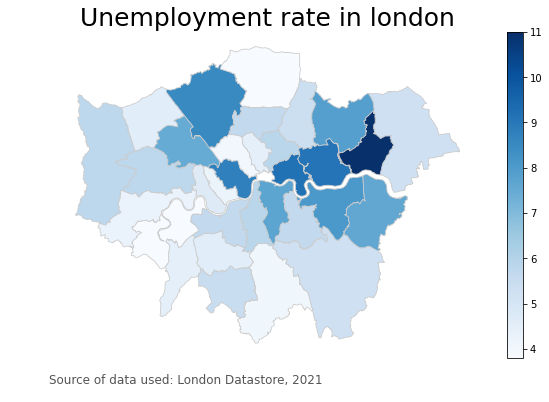

In [54]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt


lnd_map = '/content/drive/MyDrive/lONDON MAP/London_Borough_Excluding_MHW.shp'
map_df = gpd.read_file(lnd_map)

lnd_info = pd.read_csv('/content/drive/MyDrive/making_map.csv', header=0)
lnd_info = lnd_info.rename(index=str)

del lnd_info['Unnamed: 0']
print(lnd_info.head())

merged = map_df.set_index('NAME').join(lnd_info.set_index('Borough'))
def create_map(interest, title, filename ):
  vmin, vmax = min(lnd_info[interest]), max(lnd_info[interest])
  fig,ax = plt.subplots(1, figsize=(10,6))
  merged.plot(column=interest, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')
  ax.axis('off')
  ax.set_title(title, fontdict= {'fontsize': '25', 'fontweight': '2'})
  ax.annotate('Source of data used: London Datastore, 2021', xy=(0.09, .07),xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top', fontsize=12, color='#555555')
  sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
  sm._A = []
  cbar = fig.colorbar(sm)
  fig.savefig(f'/content/drive/MyDrive/Project ce888 graphs/{filename}.png', dpi=300)

create_map('Unemployment_rate_(2015)', 'Unemployment rate in london', 'Unemployment')